# Real-time Machine Learning - Homework 1
### Armin Danesh

## Problem 1
------------------

First we open the images using pillow

In [68]:
#importing pillow and numpy
from PIL import Image
import numpy as np

In [69]:
#opennign the images
red_img = Image.open('red.jpg')
green_img = Image.open('green.jpg')
blue_img = Image.open('blue.jpg')

Now to make sure that the images are correctly opened, we check the shape of the images:

In [60]:
#checking the size of the images
red_img.size, green_img.size, blue_img.size

((1280, 853), (1280, 832), (2000, 1333))

They are in different shapes, however since we want to take the mean this does not matter, and we do not need to crop the images.

Now, we convert the images into numpy arrays. This step is redundant and images can be directly converted to torch.tensor, but it is good to  have a sample code here. 

In [70]:
#converting images to np array (this is redundant, but wanted to have it)
red_arr = np.array(red_img)
green_arr = np.array(green_img)
blue_arr = np.array(blue_img)

In [62]:
#checking the shapes
red_arr.shape, green_arr.shape, blue_arr.shape

((853, 1280, 3), (832, 1280, 3), (1333, 2000, 3))

Here we convert all the np arrays to torch tensors:

In [71]:
#importing torch
import torch

In [72]:
#converting np arrays to torch tensor
red_tensor = torch.tensor(red_arr, dtype = torch.float32)
green_tensor = torch.tensor(green_arr, dtype = torch.float32)
blue_tensor = torch.tensor(blue_arr, dtype = torch.float32)

In [73]:
#checking the shape of the tensors
red_tensor.shape, green_tensor.shape, blue_tensor.shape

(torch.Size([853, 1280, 3]),
 torch.Size([832, 1280, 3]),
 torch.Size([1333, 2000, 3]))

For checking the brighness we just have to get the mean of all the numbers in the tensor. The higher the number, the brighter the image is:

In [74]:
#getting the mean to check the brightness of the images
red_mean = torch.mean(red_tensor)
green_mean = torch.mean(green_tensor)
blue_mean = torch.mean(blue_tensor)
red_mean, green_mean, blue_mean

(tensor(114.2073), tensor(56.6266), tensor(83.2382))

Based on the outputs, we know that the red image is the brightest, then the blue image and finally the green image.

It is also possible to look at the mean of each channgel and roughly guess the main color of the image:

In [75]:
#getting the mean of each channel to figure out the main color
red_r_mean = torch.mean(red_tensor[:,:,0])
red_g_mean = torch.mean(red_tensor[:,:,1])
red_b_mean = torch.mean(red_tensor[:,:,2])
red_r_mean, red_g_mean, red_b_mean

(tensor(221.5404), tensor(61.4895), tensor(59.5919))

In [57]:
#getting the mean of each channel to figure out the main color
green_r_mean = torch.mean(green_tensor[:,:,0])
green_g_mean = torch.mean(green_tensor[:,:,1])
green_b_mean = torch.mean(green_tensor[:,:,2])
green_r_mean, green_g_mean, green_b_mean

(tensor(39.0309), tensor(112.0930), tensor(18.7558))

In [56]:
#getting the mean of each channel to figure out the main color
blue_r_mean = torch.mean(blue_tensor[:,:,0])
blue_g_mean = torch.mean(blue_tensor[:,:,1])
blue_b_mean = torch.mean(blue_tensor[:,:,2])
blue_mean, blue_g_mean, blue_b_mean

(tensor(83.2382), tensor(96.5594), tensor(142.4650))

We can see that for the red image, the first channel (red) has the highest mean. For the green image the second channel (green) has the highest mean and for the blue image the third channel (blue) has the highest mean.

## Problem 2

-----------------------

First we bring everything from the lectures. However since we are moving from linear model to quadratic, we have to change the model, the derivative calculation and the gradiant function. According to this change, the final grad_fn changes: 

In [88]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

def model (t_u, w2, w1, b):
  return w2 * t_u ** 2 + w1 * t_u + b

def loss_fn (t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def dloss_fn (t_p, t_c):
  return 2 * (t_p - t_c) / t_p.size(0)

def dmodel_dw2 (t_u, w2):
  return 2 * w2 * t_u

def dmodel_dw1 (t_u, w1):
  return w1

def dmodel_db (t_u, b):
  return 1.0

def grad_fn (t_u, t_c, t_p, w2, w1, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w2)
  dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1)
  dloss_db  = dloss_dtp * dmodel_db(t_u, b)
  return torch.stack([dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])

def training_loop (n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w2, w1, b = params
    
    t_p = model(t_u, w2, w1, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w2, w1, b)

    params = params - learning_rate * grad
    if (epoch % 500 == 0):
      print ('Epoch %d, Loss %f' % (epoch, float(loss)))

  return params

t_un = 0.1 * t_u

Now we start the training with a high learning rate and change it until we see the best loss:

In [108]:
params1 = training_loop(n_epochs = 5000, learning_rate = 0.1, 
              params = torch.tensor([1.0, 1.0, 0.0]),
              t_u = t_un, t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [109]:
params2 = training_loop(n_epochs = 5000, learning_rate = 0.01, 
              params = torch.tensor([1.0, 1.0, 0.0]),
              t_u = t_un, t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [110]:
params3 = training_loop(n_epochs = 5000, learning_rate = 0.001, 
              params = torch.tensor([1.0, 1.0, 0.0]),
              t_u = t_un, t_c = t_c)

Epoch 500, Loss 8.207376
Epoch 1000, Loss 5.957879
Epoch 1500, Loss 4.793697
Epoch 2000, Loss 4.094471
Epoch 2500, Loss 3.641978
Epoch 3000, Loss 3.337545
Epoch 3500, Loss 3.128551
Epoch 4000, Loss 2.983709
Epoch 4500, Loss 2.883058
Epoch 5000, Loss 2.813279


In [111]:
params4 = training_loop(n_epochs = 5000, learning_rate = 0.0001, 
              params = torch.tensor([1.0, 1.0, 0.0]),
              t_u = t_un, t_c = t_c)

Epoch 500, Loss 12.978827
Epoch 1000, Loss 12.147491
Epoch 1500, Loss 11.419821
Epoch 2000, Loss 10.779087
Epoch 2500, Loss 10.211207
Epoch 3000, Loss 9.704861
Epoch 3500, Loss 9.250857
Epoch 4000, Loss 8.841681
Epoch 4500, Loss 8.471140
Epoch 5000, Loss 8.134112


As you can see, 0.001 gives us the best loss. When we move to 0.0001, our model converges at a lower pace, and needs more epochs to reach a better loss. Thus, here we consider the third training process as the best one.

Now we plot it alongside the model from the lectures to see which one gives the best result:

In [112]:
from matplotlib import pyplot as plt

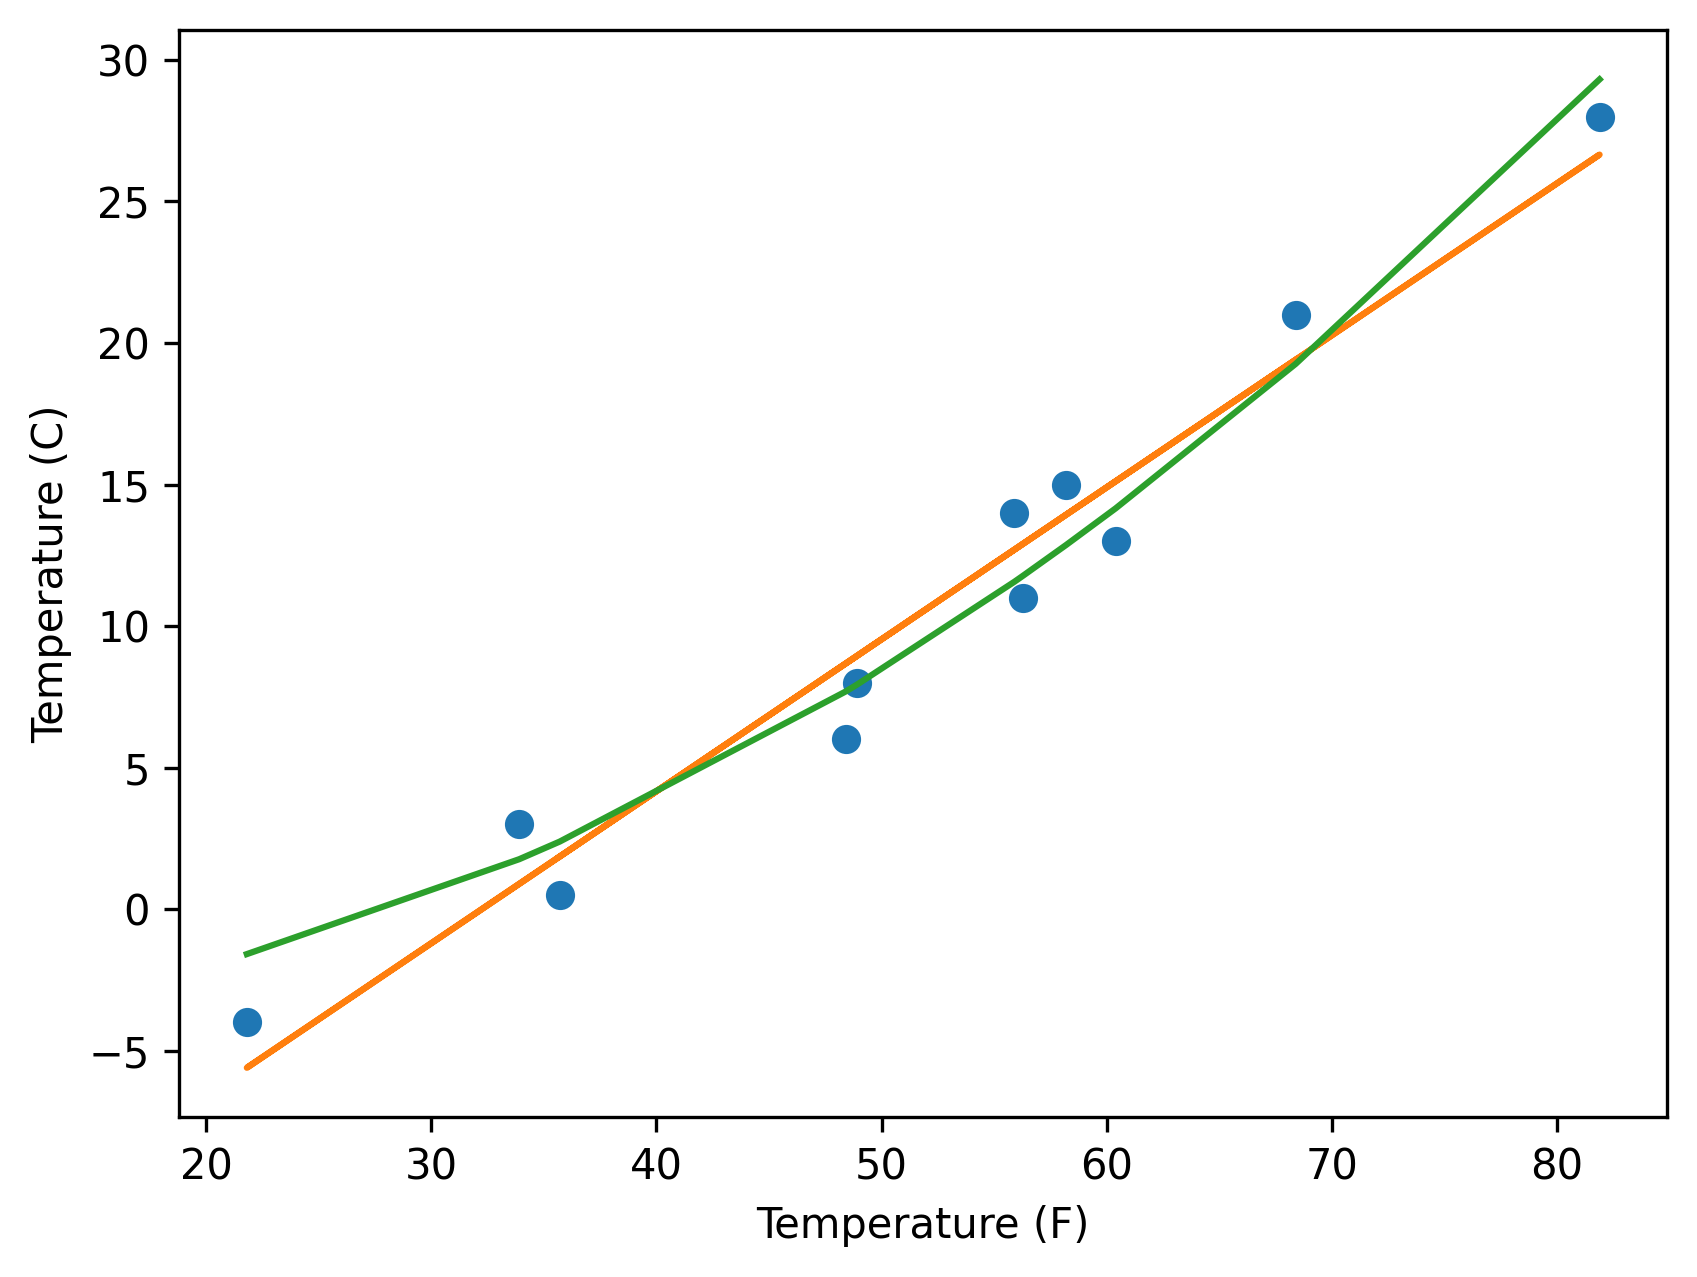

In [116]:
t_p = model (t_un, *params3)

fig = plt.figure(figsize = [6.4, 4.8], dpi = 300)
plt.xlabel ("Temperature (F)")
plt.ylabel ("Temperature (C)")
plt.plot (t_u.numpy(), t_c.numpy(), "o")
plt.plot (t_u.numpy() ,5.3671 * t_un - 17.3012)
plt.plot (np.sort(t_u.numpy()), np.sort(t_p.numpy()))

The loss from the lectures is 2.92 but the loss here is 2.81. Thus the non-linearity increases the quality of the model.

## Promlem 3
-----------------------

First we have to load the .csv file. To do so we use pandas.

In [217]:
import pandas as pd

In [218]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Here we separate the values that we want for our training which are area, bedrooms, bathrooms, stories, and parking. Based on these, we want to predict the price. 

In [219]:
x_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
y_vars = ['price']
x_df = housing[x_vars]
y_df = housing[y_vars]
x_df.head()

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


Just like the previous section, we write the model, loss function, and gradiant descent, but for 6 parameters. 

In [221]:
def model (params, x):
  return params[5]*x[:,4] + params[4]*x[:,3] + params[3]*x[:,2]
  + params[2]*x[:,1]+ params[1]*x[:,0] + params[0]

def loss_fn (y_p, y):
  squared_diffs = (y_p - y)**2
  return squared_diffs.mean()

def dloss_fn (y_p, y):
  return 2 * (y_p - y) / y_p.size(0)

def dmodel_dw4 (w, x):
  return x[:,4]

def dmodel_dw3 (w, x):
  return x[:,3]

def dmodel_dw2 (w, x):
  return x[:,2]

def dmodel_dw1 (w, x):
  return x[:,1]

def dmodel_dw0 (w, x):
  return x[:,0]

def dmodel_db (params):
  return 1.0

def grad_fn (x, y, y_p, params):
  dloss_dyp = dloss_fn (y_p, y)
  dloss_dw4 = dloss_dyp * dmodel_dw4 (params, x)
  dloss_dw3 = dloss_dyp * dmodel_dw3 (params, x)
  dloss_dw2 = dloss_dyp * dmodel_dw2 (params, x)
  dloss_dw1 = dloss_dyp * dmodel_dw1 (params, x)
  dloss_dw0 = dloss_dyp * dmodel_dw0 (params, x)
  dloss_db  = dloss_dyp * dmodel_db(params)
  return torch.stack([dloss_dw4.sum(), dloss_dw3.sum(), dloss_dw2.sum(), 
                      dloss_dw1.sum(), dloss_dw0.sum(), dloss_db.sum()])

def training_loop (n_epochs, learning_rate, params, x, y):
  for epoch in range(1, n_epochs + 1):
    
    y_p = model(params, x)
    loss = loss_fn(y_p, y)
    grad = grad_fn(x, y, y_p, params)

    params = params - learning_rate * grad

    if (epoch % 500 == 0):
      print ('Epoch %d, Loss %f' % (epoch, float(loss)))

  return params

Here we convrt pandas dataframe to torch tensor:

In [222]:
x = torch.tensor(x_df.values, dtype = torch.float64)
y = torch.tensor(housing['price'].values, dtype = torch.float64)
y.shape

torch.Size([545])

We normalize our inputs in a very simple way to push them into a specific range so that our training may converge faster:

In [223]:
normalized_x = torch.nn.functional.normalize(x, dim = 0)
normalized_x

tensor([[0.0569, 0.0561, 0.0620, 0.0642, 0.0775],
        [0.0687, 0.0561, 0.1241, 0.0856, 0.1162],
        [0.0763, 0.0421, 0.0620, 0.0428, 0.0775],
        ...,
        [0.0277, 0.0280, 0.0310, 0.0214, 0.0000],
        [0.0223, 0.0421, 0.0310, 0.0214, 0.0000],
        [0.0295, 0.0421, 0.0310, 0.0428, 0.0000]], dtype=torch.float64)

We start the training with a learning of 0.1 and reduce it to 0.0001:

In [224]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
params = training_loop(5000, 0.1, params, normalized_x, y)

Epoch 500, Loss 21527365429800.191406
Epoch 1000, Loss 24239310612996.210938
Epoch 1500, Loss 25035541606579.308594
Epoch 2000, Loss 25759972933079.582031
Epoch 2500, Loss 26507710142568.332031
Epoch 3000, Loss 27284465473253.667969
Epoch 3500, Loss 28091680697091.457031
Epoch 4000, Loss 28930642197583.296875
Epoch 4500, Loss 29802681497670.417969
Epoch 5000, Loss 30709187234405.140625


In [225]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
params = training_loop(5000, 0.01, params, normalized_x, y)

Epoch 500, Loss 15741784735822.912109
Epoch 1000, Loss 12428033335815.000000
Epoch 1500, Loss 12409401062579.669922
Epoch 2000, Loss 13726635608044.496094
Epoch 2500, Loss 15432556481207.373047
Epoch 3000, Loss 17099841900577.794922
Epoch 3500, Loss 18561161190319.906250
Epoch 4000, Loss 19773696249095.710938
Epoch 4500, Loss 20749822946721.109375
Epoch 5000, Loss 21522655898376.820312


In [226]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
params = training_loop(5000, 0.001, params, normalized_x, y)

Epoch 500, Loss 24670617182547.296875
Epoch 1000, Loss 23256393590196.359375
Epoch 1500, Loss 21965385318737.058594
Epoch 2000, Loss 20789152531848.246094
Epoch 2500, Loss 19719788004187.207031
Epoch 3000, Loss 18749884676565.398438
Epoch 3500, Loss 17872505155088.167969
Epoch 4000, Loss 17081153038719.742188
Epoch 4500, Loss 16369745966574.392578
Epoch 5000, Loss 15732590282670.207031


In [227]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0])
params = training_loop(5000, 0.0001, params, normalized_x, y)

Epoch 500, Loss 26053321216475.667969
Epoch 1000, Loss 25893895088920.285156
Epoch 1500, Loss 25735866793431.515625
Epoch 2000, Loss 25579226569093.187500
Epoch 2500, Loss 25423964718025.863281
Epoch 3000, Loss 25270071604993.144531
Epoch 3500, Loss 25117537657010.445312
Epoch 4000, Loss 24966353362956.125000
Epoch 4500, Loss 24816509273185.042969
Epoch 5000, Loss 24667995999144.480469


As it can be seen, 0.001 is a better learning rate, and convergance happens faster with 0.001. This is because the steps are larger, and for 0.0001 we need more epochs.